In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats
import csv

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans

from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *

warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
dataset = read_csv("Week 1.csv", encoding="ISO-8859-1")
df=dataset[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]
df2=read_csv("Testing dataset.csv", encoding="ISO-8859-1")
df3=read_csv("Testing result.csv", encoding="ISO-8859-1")

In [3]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8]]
y=df.iloc[:,9]

Z=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]
yy=df3.iloc[:,[1]]

In [4]:
all_classes=['Not Completed','Completed']

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Number of mislabeled points out of a total 25310 points : 150 


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24307
         1.0       0.94      0.91      0.92      1003

   micro avg       0.99      0.99      0.99     25310
   macro avg       0.97      0.95      0.96     25310
weighted avg       0.99      0.99      0.99     25310

Recall score:  0.9122632103688934
Precision score:  0.9940120142181904

Accuracy score  99.40734887396286 %
RMS Error  0.5926511260371394 %

Area under Curve: 0.955


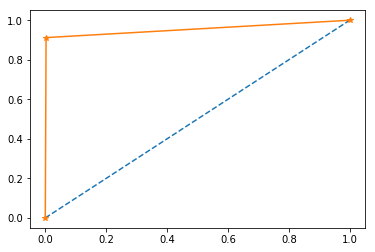


Confusion matrix, without normalization
[[24245    62]
 [   88   915]]


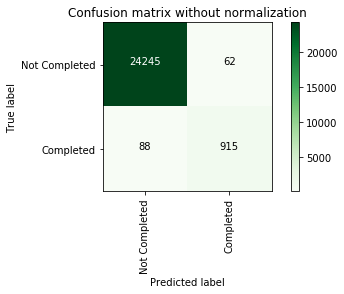

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, shuffle=True)
clf = LinearDiscriminantAnalysis(solver='lsqr')
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d \n\n" % (X_test.shape[0],(y_test != predictions).sum()))
print(classification_report(y_test,predictions))
print("Recall score: ", recall_score(y_test,predictions))
print("Precision score: ", precision_score(y_test,predictions,average='weighted'))
print("\nAccuracy score ",accuracy_score(y_test, predictions)*100,"%")
print("RMS Error ", mean_squared_error(y_test, predictions, multioutput = 'uniform_average')*100, "%")

auc = roc_auc_score(y_test, predictions)
print('\nArea under Curve: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='*')
# show the plot
pyplot.show()

cnf_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')

Accuracy score:  98.42943419143695 %
RMS Error:  1.570565808563042 %
Area under Curve: 0.955


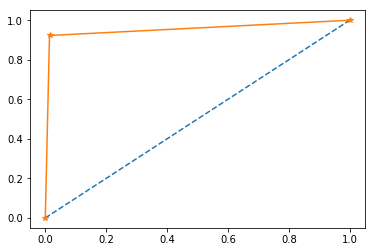

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     57538
           1       0.67      0.92      0.78      1740

   micro avg       0.98      0.98      0.98     59278
   macro avg       0.83      0.95      0.88     59278
weighted avg       0.99      0.98      0.99     59278

Recall score:  0.9229885057471264
Precision score:  0.9879775687840806

Confusion matrix, without normalization
[[56741   797]
 [  134  1606]]


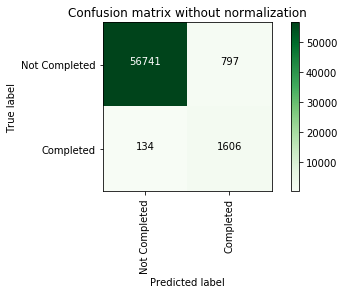

In [7]:
#Predictions on different test dataset

predictions=clf.predict(Z)

print("Accuracy score: ",accuracy_score(yy, predictions)*100,"%")
print("RMS Error: ", mean_squared_error(yy, predictions, multioutput = 'uniform_average')*100,"%")

auc = roc_auc_score(yy, predictions)
print('Area under Curve: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(yy, predictions)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='*')
# show the plot
pyplot.show()

print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')